In [5]:
#%matplotlib inline
import json
import pandas as pd
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('./tool_adoption_distribution.csv', low_memory=False)

with open('./tool_cates.json', 'r') as jsonf:
    tool_cates = json.load(jsonf)

In [3]:
def time_to_float(time):
    time = str(time)
    
    if '-' not in time:   
        return None
    
    year_month_day, mins = time.split(' ')
    year, month, day = year_month_day.split('-')
    result = float(year) + float(month)/12 + float(day)/365
    
    return result

save testing
save minif
save browser
save coverage
save linter
save depmgr


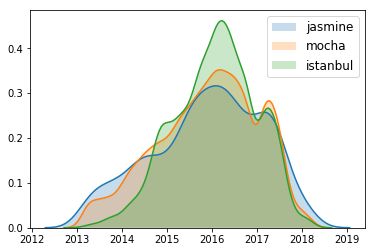

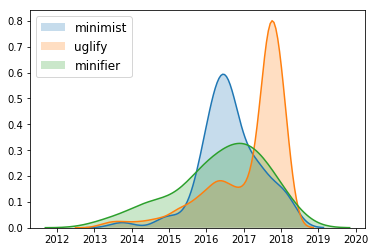

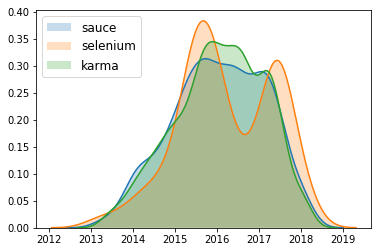

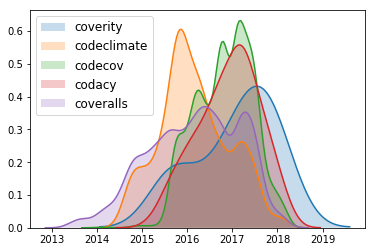

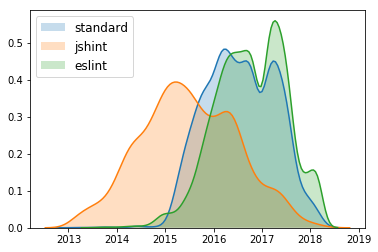

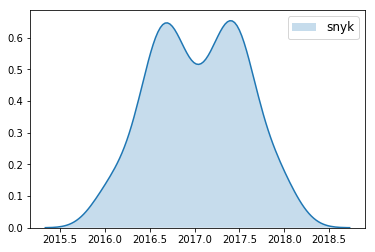

In [10]:
for cate in tool_cates:
    fig = plt.figure()
    legends = []
    
    for index in tool_cates[cate]:
        
        #  only 2 adoptions as gemnasium, not enough to produce density plot.
        if index == 'gemnasium': continue
        
        legends.append(index)
        df[index] = pd.to_datetime(df[index])
        distribution = df[index].map(time_to_float)
        distribution = distribution.tolist()
        distribution = [d for d in distribution if not pd.isna(d)]
        sns.kdeplot(distribution, shade=True)

    plt.legend(labels=legends, fontsize=12)
    #fig.savefig("{}.pdf".format(cate), bbox_inches='tight')
    #print('save {}'.format(cate))